In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import cv2 
import pickle
import glob

## Calibrate Camera and put calibration data in pickle file

number of image paths:  34
index:  0
index:  1
index:  2
index:  3
index:  4
index:  5
index:  6
index:  7
index:  8
index:  9
index:  10
index:  11
index:  12
index:  13
index:  14
index:  15
index:  16
index:  17
index:  18
index:  19
index:  20
index:  21
index:  22
index:  23
index:  24
index:  25
index:  26
index:  27
index:  28
index:  29
index:  30
index:  31
index:  32
index:  33
done iterating
mtx:  [[ 935.06166314    0.          959.83792126]
 [   0.          935.52918157  601.21106899]
 [   0.            0.            1.        ]]
dist:  [[-0.32638908  0.1609455  -0.01799423  0.00044072 -0.04253547]]


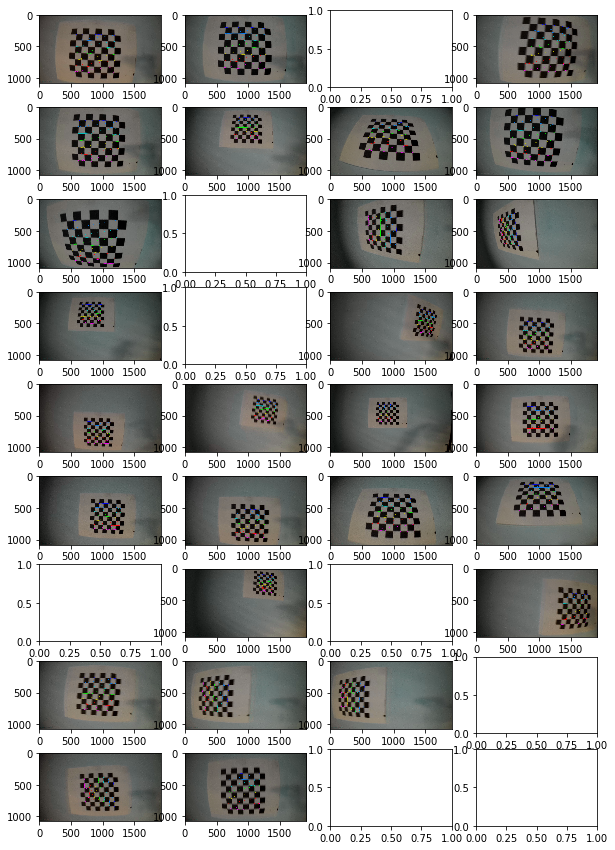

In [5]:
image_paths = glob.glob('Lincoln_MKZ/1920x1080/raw_frames/*.png')
#print('image paths: ',image_paths)
num_image_paths = len(image_paths)
print('number of image paths: ',num_image_paths)

nx = 7 # number of inside corners per row
ny = 7 # number of inside corners per col

"""
prepare object points:
[[0,0,0],
 [1,0,0],
 [2,0,0],
 ......,
 [7,7,0]
"""
objp = np.zeros((ny*nx,3),np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Lists to store object points and image points from all images
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image space

f, axs = plt.subplots(num_image_paths//4+1,4,figsize=(10,15))
axs = axs.ravel()

# Iterate through list of images and draw chessboard corners on image
for index,fileName  in enumerate(image_paths):
    print("index: ", index)
    image = cv2.imread(fileName)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    # If chessboard corners found
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw the corners
        cv2.drawChessboardCorners(image, (nx,ny), corners, ret)
        axs[index].imshow(image)
print("done iterating")
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,
                                                   gray.shape[::-1], # tuple (width,height)
                                                   None, None)
print('mtx: ',mtx)
print('dist: ', dist)


## Save Camera Calibration to Pickle File

In [ ]:
file_name = 'Mobius_Dashcam_Camera_Cal/1920x1080/mobius_dashcam_1920x1080_calibration.p'

with open(file_name, 'wb') as f: 
    pickle.dump([mtx, dist], f)

## Load Pickle Data

In [6]:
file_name = 'Mobius_Dashcam_Camera_Cal/1920x1080/mobius_dashcam_1920x1080_calibration.p'
, 
with open(file_name, 'rb') as f:   
    mtx, dist = pickle.load(f)
h,  w = image.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h))
print('newcameramtx: ',newcameramtx)
print('roi: ',roi)
print('mtx: ',mtx)
print('dist: ', dist)

newcameramtx:  [[ -2.13053394e+03   0.00000000e+00   6.49012322e+02]
 [  0.00000000e+00   8.35991333e+02   5.90296210e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
roi:  (0, 0, 0, 0)
mtx:  [[ 935.06166314    0.          959.83792126]
 [   0.          935.52918157  601.21106899]
 [   0.            0.            1.        ]]
dist:  [[-0.32638908  0.1609455  -0.01799423  0.00044072 -0.04253547]]


## Checking to make sure camera is calibrated properly

(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)


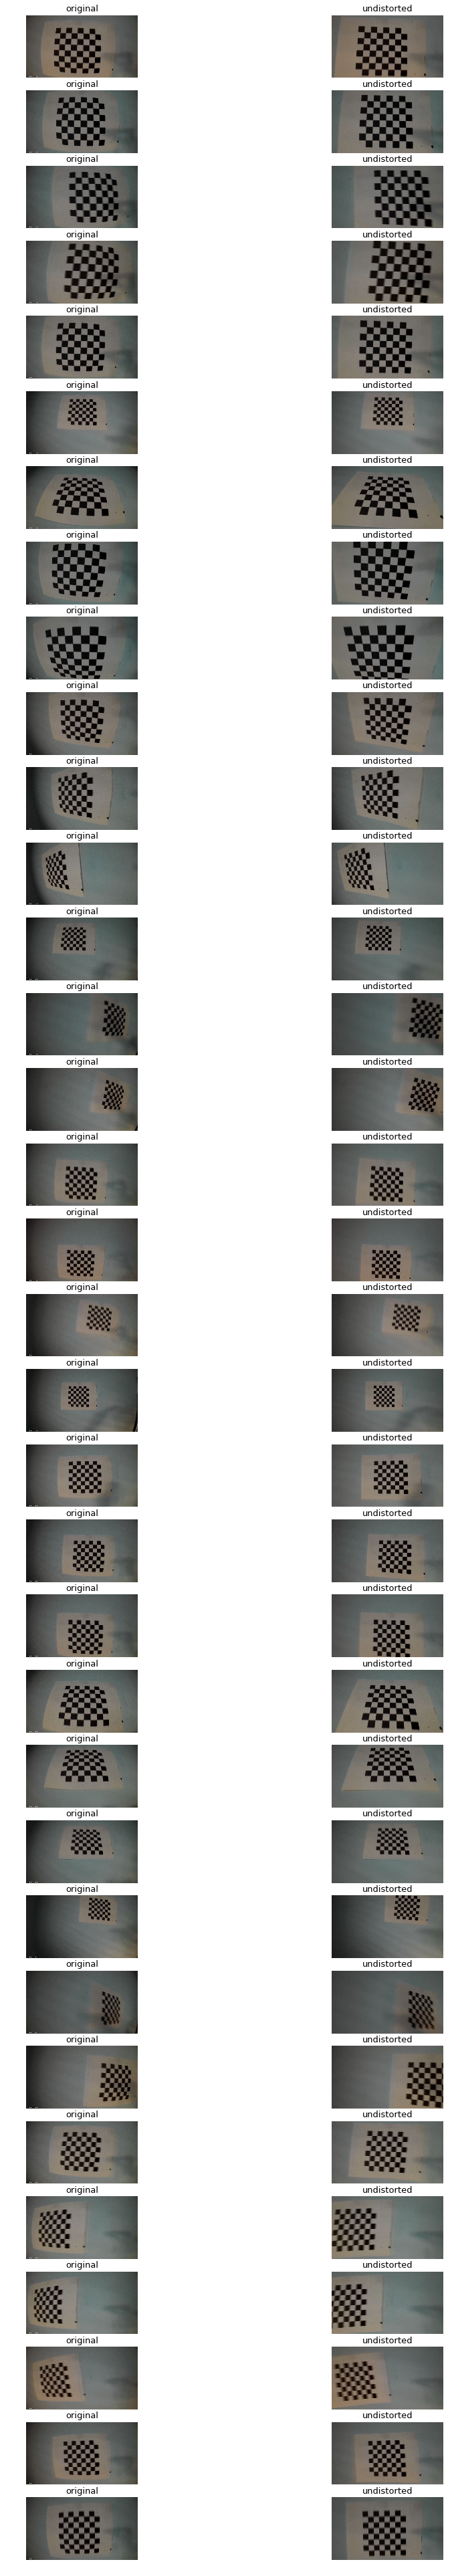

In [7]:
f, axs = plt.subplots(num_image_paths,2,figsize=(15,70))
axs = axs.ravel()
plt.axis('off')
for i,image_path in enumerate(image_paths):
    image = cv2.imread(image_path)
    #print('image.shape: ',image.shape)
    # undistort
    dst = cv2.undistort(image, mtx, dist, None, newcameramtx)

    # crop the image
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    print(dst.shape)
    #cv2.imwrite('calibresult.png',dst)
    image_undistorted = cv2.undistort(image, mtx, dist, None, mtx)
    axs[i*2].imshow(image)
    axs[i*2].axis('off')
    axs[i*2].set_title('original',fontsize=13)
    axs[i*2+1].imshow(image_undistorted)
    axs[i*2+1].axis('off')
    axs[i*2+1].set_title('undistorted',fontsize=13)

plt.show()